# Assignment 13 - Autoencoders

1. Change the endcoding_dim through various values (range(2,18,2)) and store the best loss. Plot the 8 pairs of dimension vs loss on a scatter plot
2. Using the previous assignment's model of detecting images, how does the accuracy change when you run the double-digit predeiction model on these 'decoded' values?
3. Apply noise to only the input of the autoencoder (not the output). Demostrate that your autoencoder can strip out noise.

In [94]:
import keras
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras import backend
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
allscores = []
alldims = []
results = []


for y in range(2,18,2):
    print("Dimension:", y)
    x = input_img = Input(shape=(784,))
    x = Dense(256, activation='relu')(x)
    x = Dense(128,activation ='relu')(x)
    encoded = Dense(y, activation='relu')(x)
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)
                
    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)
    encoded_input = Input(shape=(y,))
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    autoencoder.fit(xtrain, xtrain,
               epochs=5,
               batch_size=256,
               shuffle=True,
               validation_data=(xtest, xtest),
               callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
    score = autoencoder.evaluate(xtrain, xtrain, verbose=0)
    result = [y, score]
    results.append(result)


Dimension: 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.4968 - val_loss: 0.2657
Epoch 2/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.2612 - val_loss: 0.2575
Epoch 3/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.2543 - val_loss: 0.2520
Epoch 4/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.2506 - val_loss: 0.2493
Epoch 5/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.2439 - val_loss: 0.2397
Dimension: 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.4844 - val_loss: 0.2662
Epoch 2/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.2608 - val_loss: 0.2568
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.2536 - val_loss: 0.2514
Epoch 4/5
60000/60000 [================

In [110]:
print(results)

[[2, 0.2403503497203191], [4, 0.23041638045310975], [6, 0.22910945348739625], [8, 0.22193203895092012], [10, 0.23493978126049042], [12, 0.20620374274253844], [14, 0.19989643598397572], [16, 0.19892692879041035]]


In [111]:
#Minimum loss
np.min(score)

0.19892692879041035

<function matplotlib.pyplot.show(*args, **kw)>

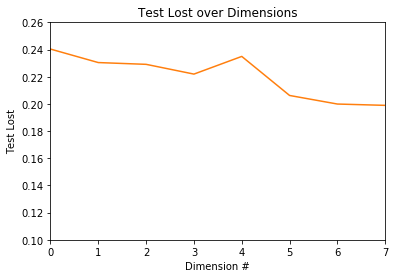

In [112]:
#Plot of loss over dimensions
plt.plot(results)
plt.title('Test Lost over Dimensions')
plt.ylabel('Test Lost')
plt.xlabel('Dimension #')
plt.axis([0,7,0.1, 0.26])
plt.show

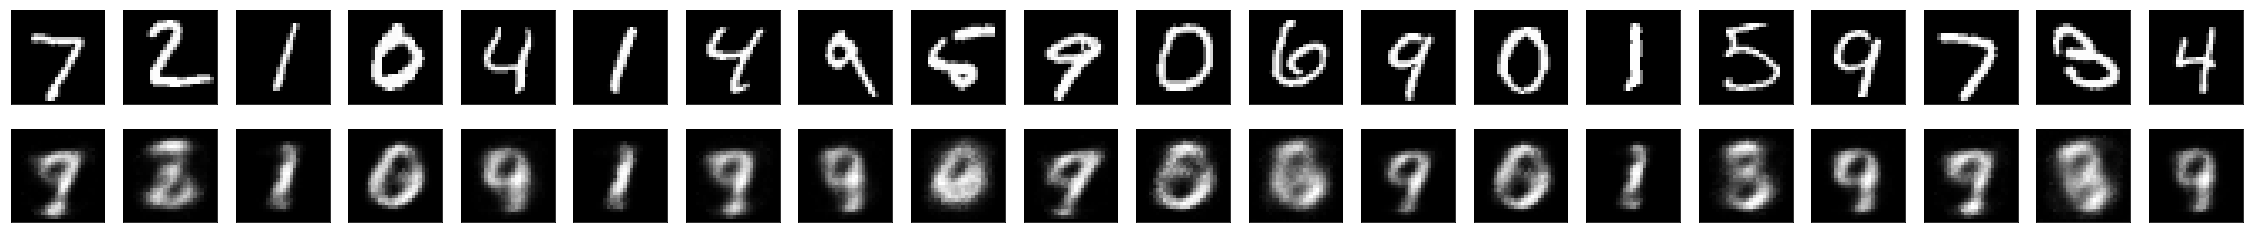

In [113]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20
plt.figure(figsize=(40,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [ ]:
import keras
from keras import backend
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Success")

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [ ]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0])

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
epochs = 20
batch_size = 128
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
## With noise added

60000 train samples
10000 test samples


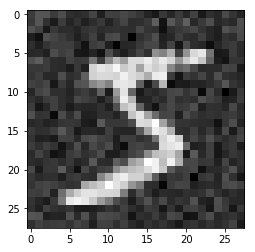

In [91]:
# Adding noise to the image
(noisy_xtrain, noisy_ytrain), (noisy_xtest, noisy_ytest) = mnist.load_data()
noisy_xtrain = noisy_xtrain+np.random.normal(noisy_xtrain, 50)
noisy_xtest = noisy_xtest+np.random.normal(noisy_xtest, 50)
plt.imshow(noisy_xtrain[0])

noisy_xtrain = noisy_xtrain.reshape(60000, 784)
noisy_xtest = noisy_xtest.reshape(10000, 784)
noisy_xtrain = noisy_xtrain.astype('float32')
noisy_xtest = noisy_xtest.astype('float32')
noisy_xtrain /= 255
noisy_xtest /= 255
print(noisy_xtrain.shape[0], 'train samples')
print(noisy_xtest.shape[0], 'test samples')

In [ ]:
epochs = 20
batch_size = 128
num_classes = 10

noisy_ytrain = keras.utils.to_categorical(noisy_ytrain, num_classes)
noisy_ytest = keras.utils.to_categorical(noisy_ytest, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(noisy_xtrain, noisy_ytrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(noisy_xtest, noisy_ytest))
score50 = model.evaluate(noisy_xtest, noisy_ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
parameters = range(0, 100, 10)
epochs = 20
batch_size = 128
num_classes = 10
allscores=[]

for x in parameters:
    (noisy_xtrain, noisy_ytrain), (noisy_xtest, noisy_ytest) = mnist.load_data()
    noisy_xtrain = noisy_xtrain+np.random.normal(noisy_xtrain, x)
    noisy_xtest = noisy_xtest+np.random.normal(noisy_xtest, x)
    print(x)

    noisy_xtrain = noisy_xtrain.reshape(60000, 784)
    noisy_xtest = noisy_xtest.reshape(10000, 784)
    noisy_xtrain = noisy_xtrain.astype('float32')
    noisy_xtest = noisy_xtest.astype('float32')
    noisy_xtrain /= 255
    noisy_xtest /= 255
    noisy_ytrain = keras.utils.to_categorical(noisy_ytrain, num_classes)
    noisy_ytest = keras.utils.to_categorical(noisy_ytest, num_classes)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    history = model.fit(noisy_xtrain, noisy_ytrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(noisy_xtest, noisy_ytest))
    x = model.evaluate(noisy_xtest, noisy_ytest, verbose=0)
    allscores.append(x)
    

In [ ]:
print(allscores)

In [ ]:
plt.plot(allscores)
plt.title('Test Accuracy')
plt.axis([0,10,.97, 1])
plt.show

In [ ]:
plt.plot(allscores)
plt.title('Test Lost')
plt.axis([0,10,0.10, 0.27])
plt.show

In [ ]:
## As expected, the introduction of more noise (looped in increments of 10 from 0 to 100 above) 
## leads to higher test lost and lower test accuracy in the network.

In [100]:
#encoder with noisy data

xtrain = noisy_xtrain
xtest = noisy_xtest

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
allscores = []
alldims = []
noisyresults = []

for y in range(2,18,2):
    print("Dimension:", y)
    x = input_img = Input(shape=(784,))
    x = Dense(256, activation='relu')(x)
    x = Dense(128,activation ='relu')(x)
    encoded = Dense(y, activation='relu')(x)
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)
                
    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)
    encoded_input = Input(shape=(y,))
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    autoencoder.fit(xtrain, xtrain,
               epochs=5,
               batch_size=256,
               shuffle=True,
               validation_data=(xtest, xtest),
               callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
    score = autoencoder.evaluate(xtrain, xtrain, verbose=0)
    noisyresult = [y, score]
    noisyresults.append(noisyresult)

Dimension: 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.2962 - val_loss: 0.0078
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0075 - val_loss: 0.0075
Epoch 3/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0073 - val_loss: 0.0074
Epoch 4/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.0073 - val_loss: 0.0074
Epoch 5/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0073 - val_loss: 0.0073
Dimension: 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.3078 - val_loss: 0.0079
Epoch 2/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0075 - val_loss: 0.0075
Epoch 3/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0073 - val_loss: 0.0074
Epoch 4/5
60000/60000 [==================

<function matplotlib.pyplot.show(*args, **kw)>

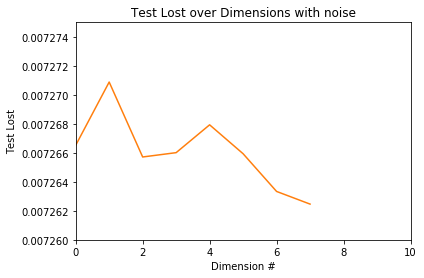

In [119]:
#Plot of loss over dimensions
plt.plot(noisyresults)
plt.title('Test Lost over Dimensions with noise')
plt.ylabel('Test Lost')
plt.xlabel('Dimension #')
plt.axis([0,10,0.00726, 0.007275])
plt.show